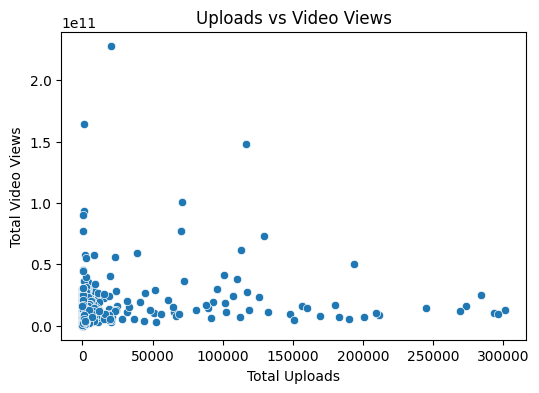


🔹 Top 10 Earning YouTube Channels:
                       Youtuber   video views  low_estimated_revenue  \
0                      T-Series  2.280000e+11           1.140000e+08   
3    Cocomelon - Nursery Rhymes  1.640000e+11           8.200000e+07   
4                     SET India  1.480000e+11           7.400000e+07   
15                     Sony SAB  1.010000e+11           5.050000e+07   
6           ýýý Kids Diana Show  9.324704e+10           4.662352e+07   
8                   Like Nastya  9.047906e+10           4.523953e+07   
11                          WWE  7.742847e+10           3.871424e+07   
995                         WWE  7.742847e+10           3.871424e+07   
9                 Vlad and Niki  7.718017e+10           3.859008e+07   
21                       Zee TV  7.313905e+10           3.656953e+07   

     high_estimated_revenue  
0              1.140000e+09  
3              8.200000e+08  
4              7.400000e+08  
15             5.050000e+08  
6              4.6623

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset with correct encoding
youtube_data = pd.read_csv("Global YouTube Statistics.csv", encoding="ISO-8859-1")

# Select relevant columns
columns_to_keep = ["Youtuber", "subscribers", "video views", "category", "uploads", "Country of origin", "created_year"]
youtube_data = youtube_data[columns_to_keep]

# Drop missing values
youtube_data.dropna(inplace=True)

# Convert data types
youtube_data["subscribers"] = youtube_data["subscribers"].astype(float)
youtube_data["video views"] = youtube_data["video views"].astype(float)
youtube_data["uploads"] = youtube_data["uploads"].astype(int)
youtube_data["created_year"] = youtube_data["created_year"].astype(int)

# 1️⃣ Revenue Estimation (CPM range: $0.5 - $5 per 1000 views)
LOW_CPM = 0.5 / 1000
HIGH_CPM = 5 / 1000

youtube_data["low_estimated_revenue"] = youtube_data["video views"] * LOW_CPM
youtube_data["high_estimated_revenue"] = youtube_data["video views"] * HIGH_CPM

# Get Top 10 Earning Channels
top_earning_channels = youtube_data.nlargest(10, "high_estimated_revenue")[["Youtuber", "video views", "low_estimated_revenue", "high_estimated_revenue"]]

# 2️⃣ Predict Future Subscriber Growth
subscriber_growth = youtube_data.groupby("created_year")["subscribers"].mean().reset_index()
X_train = subscriber_growth["created_year"].values.reshape(-1, 1)
y_train = subscriber_growth["subscribers"].values

model = LinearRegression()
model.fit(X_train, y_train)

future_years = np.array(range(2025, 2031)).reshape(-1, 1)
future_subscribers = model.predict(future_years)

future_subscriber_trend = pd.DataFrame({"Year": range(2025, 2031), "Predicted Avg Subscribers": future_subscribers})

# 3️⃣ Engagement Rate Analysis (Views per Subscriber Ratio)
youtube_data["engagement_rate"] = youtube_data["video views"] / youtube_data["subscribers"]
top_engaging_channels = youtube_data.nlargest(10, "engagement_rate")[["Youtuber", "subscribers", "video views", "engagement_rate"]]

# 4️⃣ Uploads vs. Views Analysis
plt.figure(figsize=(6, 4))
sns.scatterplot(x=youtube_data["uploads"], y=youtube_data["video views"])
plt.xlabel("Total Uploads")
plt.ylabel("Total Video Views")
plt.title("Uploads vs Video Views")
plt.show()

# 5️⃣ Display Results
print("\n🔹 Top 10 Earning YouTube Channels:")
print(top_earning_channels)

print("\n🔹 Predicted Future Subscriber Growth:")
print(future_subscriber_trend)

print("\n🔹 Top 10 Most Engaging YouTube Channels:")
print(top_engaging_channels)
